In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2016,1,22) - dt.timedelta(days=200)
ed = dt.datetime(2023,3,14) + dt.timedelta(days=1)

ticker_name = 'QLD'

ticker = ab.StockData(ticker_name)
ticker.get_data_from_yfinance(ticker_name,sd,ed+dt.timedelta(days=1))

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

#set max number of rows to display
pd.set_option('display.max_rows', 1000)

GPU acceleration is NOT available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
test_start = dt.datetime(2016,1,22)
test_end =   dt.datetime(2023,3,14)
plot_start = dt.datetime(2016,1,22)
plot_end =   dt.datetime(2023,3,14)

In [12]:
#buy and hold
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
bah.run_strategy(ticker,test_start,test_end)
bah.trades

,Signal
Date,
2016-01-22,1
2023-03-14,-1


In [13]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)


<Ab.StockData object at 0x7f69e8610d90>:
cumulative return      : 409.45%
compound anual return  : 26.1869%
max_drawdown           : -63.19%
sharp_ratio            : 4.57%
average of daily return: 0.1339%
std of daily return    : 2.9272%
number of trades       : 2,
trading days           : 2608,
batting Average        : 100.00%
Gain Average           : 409.45%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price   
0 2016-01-22  2023-03-14 00:00:00    QLD  0.119421    8.37375       42.66  \

     Profit  Profit %  HoldingDays  LongTermProfit  ShortTermProfit   
0  4.094492  4.094492       2608.0        4.094492              0.0  \

   TaxCollectYear  TaxCollected  
0          2024.0           0.0  


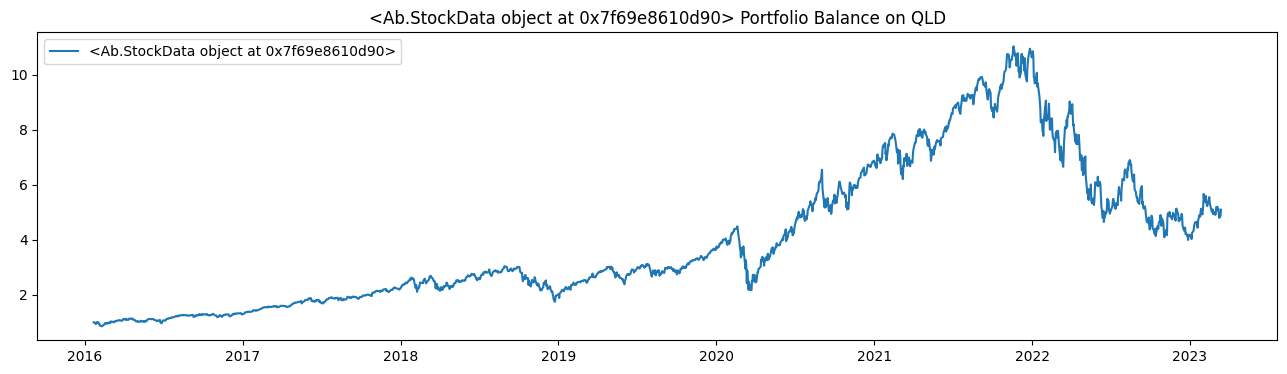

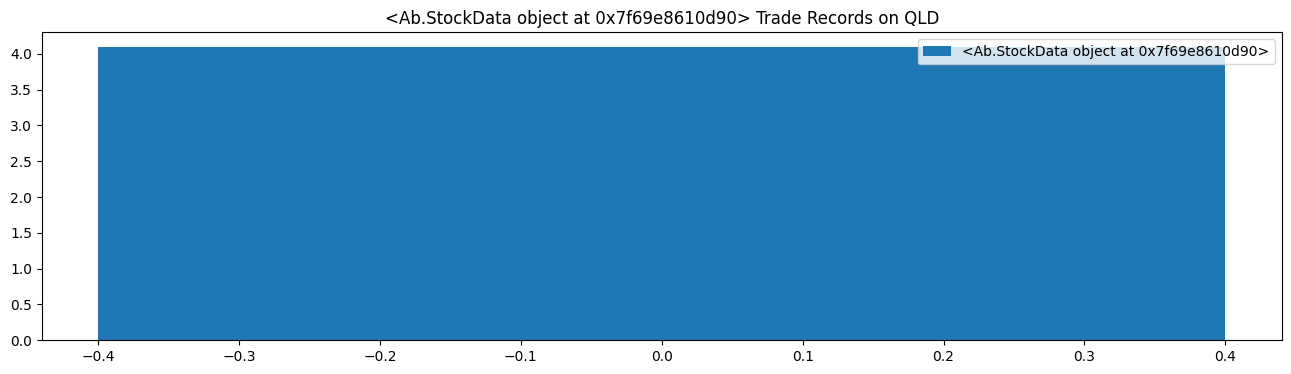

In [14]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [15]:
stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                                            spy_consecutive_buy_threshold = 1, spy_consecutive_days = 20,
                                            spy_max_off_new_high_pct = -0.2)
stg.run_strategy([ffty,spy], test_start, test_end)


In [16]:

stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)



fftyspy_stg:
cumulative return      : 630.22%
compound anual return  : 32.8467%
max_drawdown           : -26.85%
sharp_ratio            : 7.27%
average of daily return: 0.1258%
std of daily return    : 1.7315%
number of trades       : 6,
trading days           : 2608,
batting Average        : 80.00%
Gain Average           : 76.16%
Loss Average           : -1.48%
Risk Reward Ratio      : 51.52
Gain STD               : 70.56%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price   
0 2016-07-08  2018-10-10 00:00:00    QLD  0.106923   9.352500   21.430000  \
1 2019-03-13  2020-02-27 00:00:00    QLD  0.105096  21.802500   28.112499   
2 2020-06-16  2021-12-13 00:00:00    QLD  0.082986  35.602501   86.720001   
3 2023-02-13  2023-02-15 00:00:00    QLD  0.159428  45.139999   46.490002   
4 2023-02-21  2023-03-09 00:00:00    QLD  0.176724  41.939999   41.320000   

     Profit  Profit %  HoldingDays  LongTermProfit  ShortTermProfit  

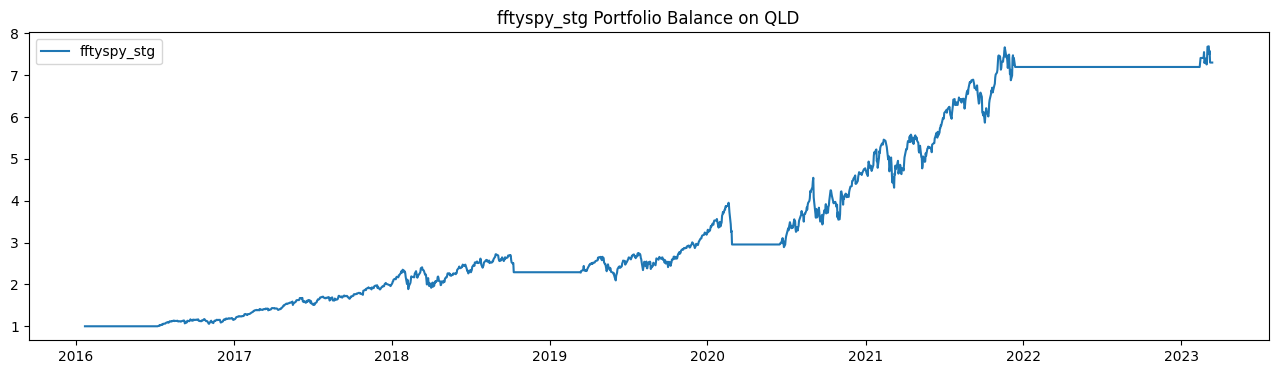

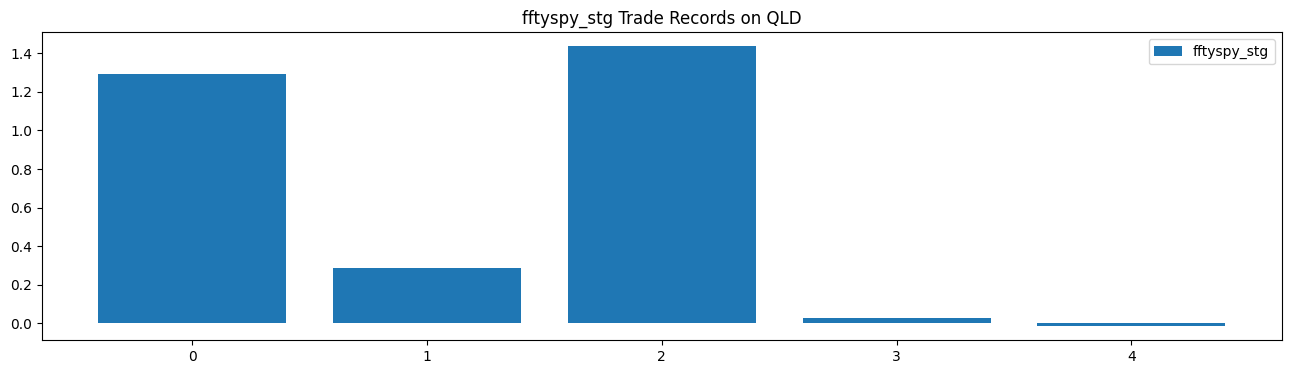

In [17]:
stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()
print(stg_bt.trade_records)


Index(['QLD', 'Weekday', 'Signal', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'FFTY',
       'FFTY-SMA200', 'Signal_x', 'SPY', 'SPY-SMA200', 'new_high',
       'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'Signal_x', 'SPY', 'SPY-SMA200', 'new_high',
       'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')


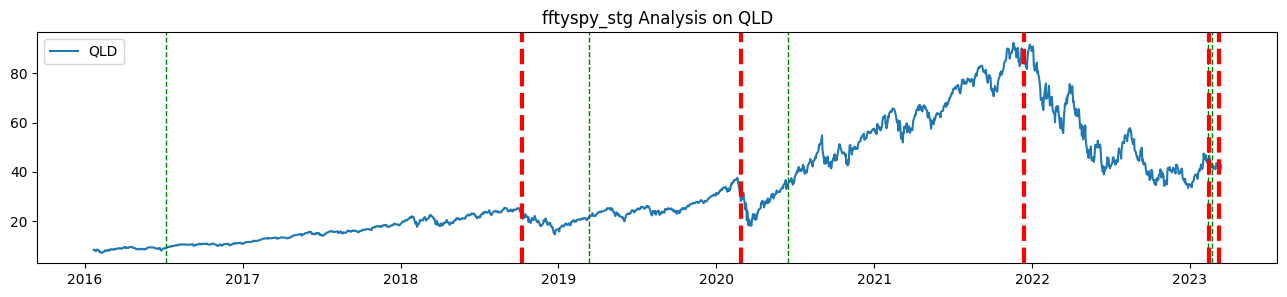

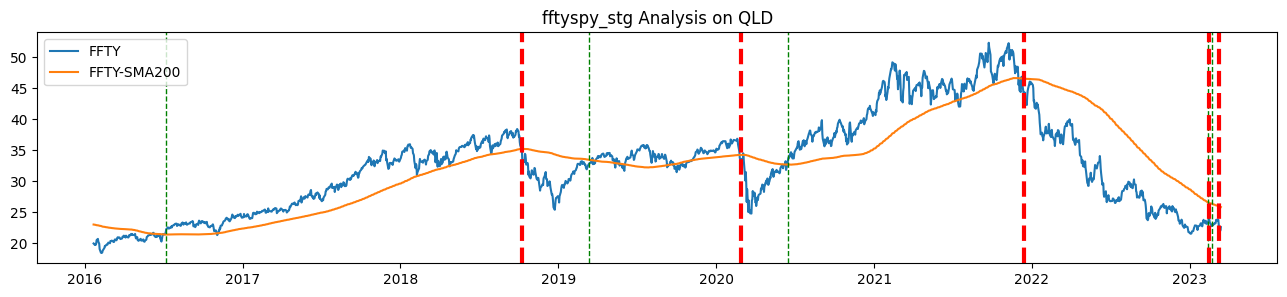

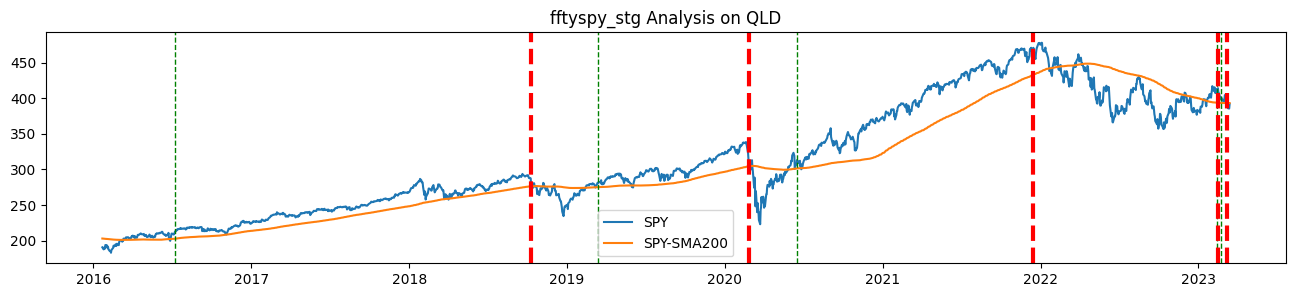

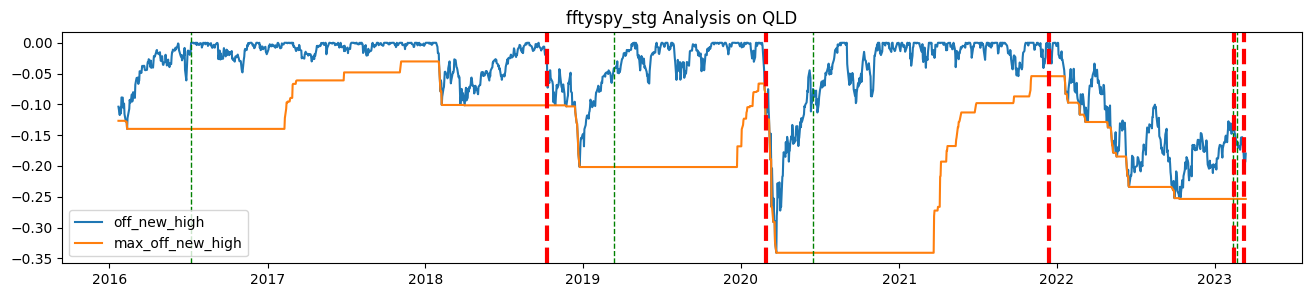

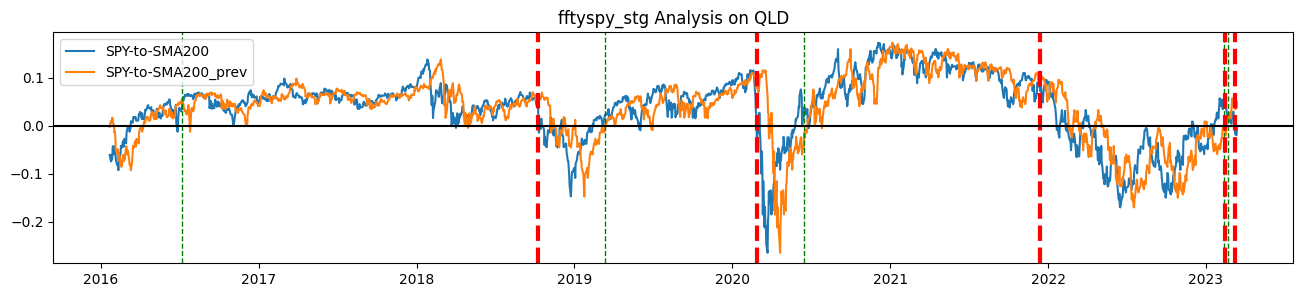

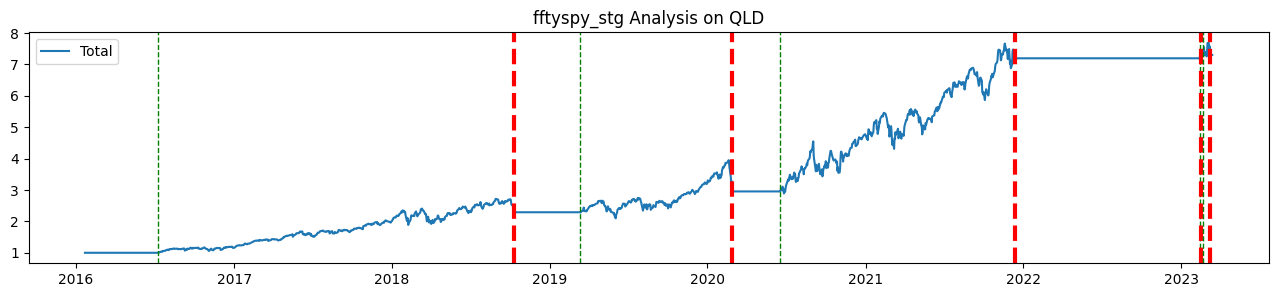

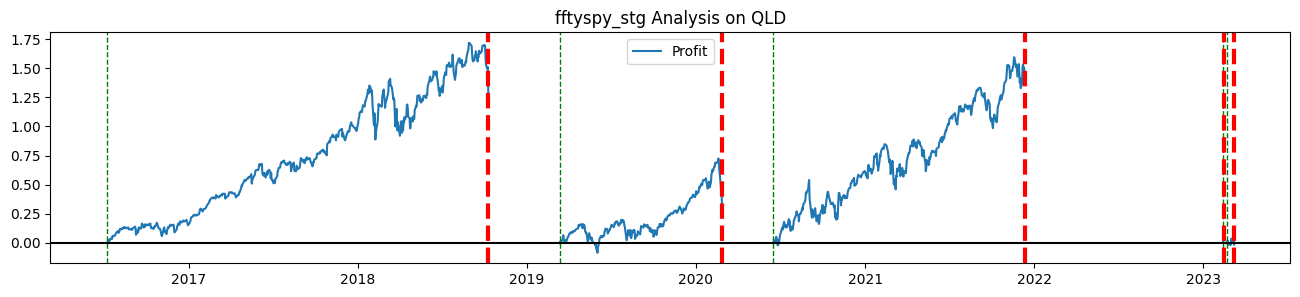

In [18]:
print(stg_bt.joined_data.columns)
print(stg.joined_data.columns)
stg_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY', 'SPY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['off_new_high', 'max_off_new_high'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY-to-SMA200','SPY-to-SMA200_prev'], plot_start, plot_end, ydash_low=0)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
stg_bt.joined_data.to_csv('{}-{}.csv'.format(stg_bt.name, ticker.ticker))


fftyspy_stg:
cumulative return      : 689.52%
compound anual return  : 34.3367%
max_drawdown           : -27.12%
sharp_ratio            : 7.34%
average of daily return: 0.1312%
std of daily return    : 1.7882%
number of trades       : 6,
trading days           : 2608,
batting Average        : 80.00%
Gain Average           : 80.20%
Loss Average           : -1.00%
Risk Reward Ratio      : 80.16
Gain STD               : 74.04%
Loss STD               : nan%
        
Index(['QLD', 'Weekday', 'Signal', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'FFTY',
       'FFTY-SMA200', 'Signal_x', 'SPY', 'SPY-SMA200', 'new_high',
       'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'Signal_x', 'SPY', 'SPY-SMA200', 'new_high',
       'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')


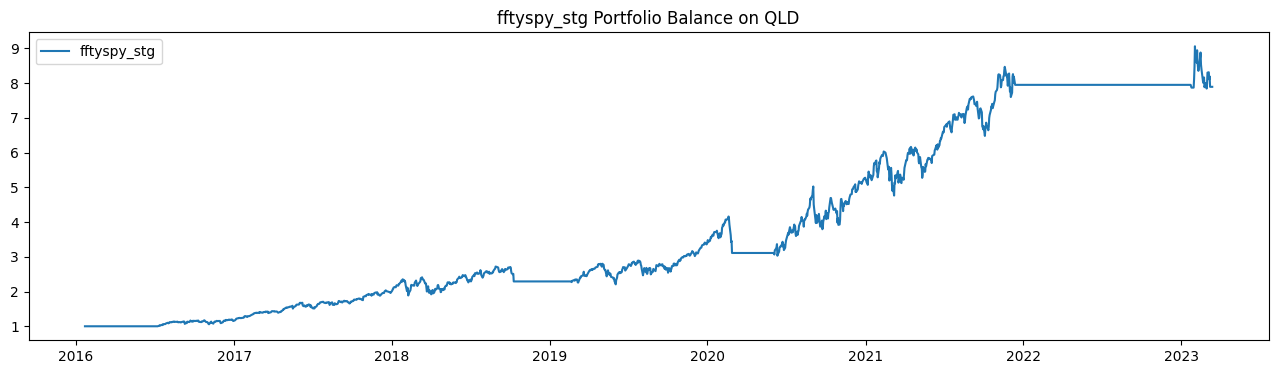

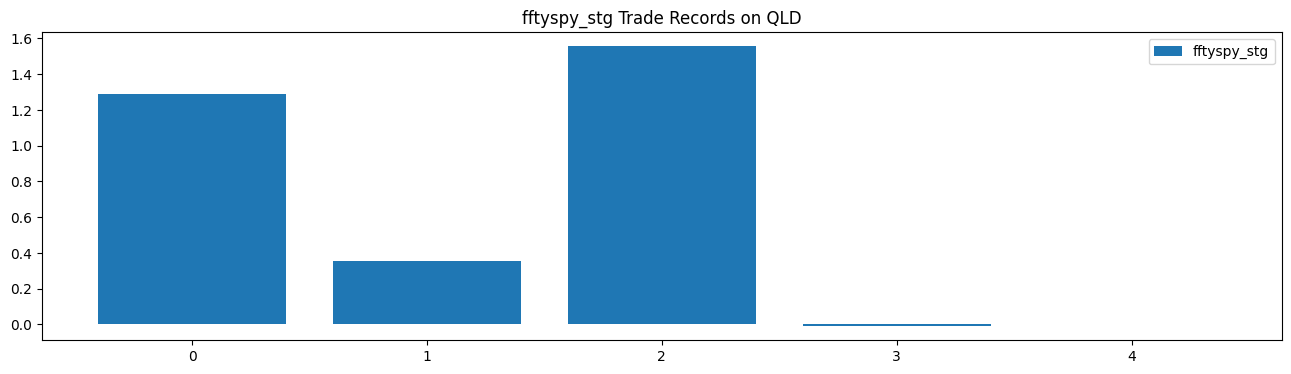

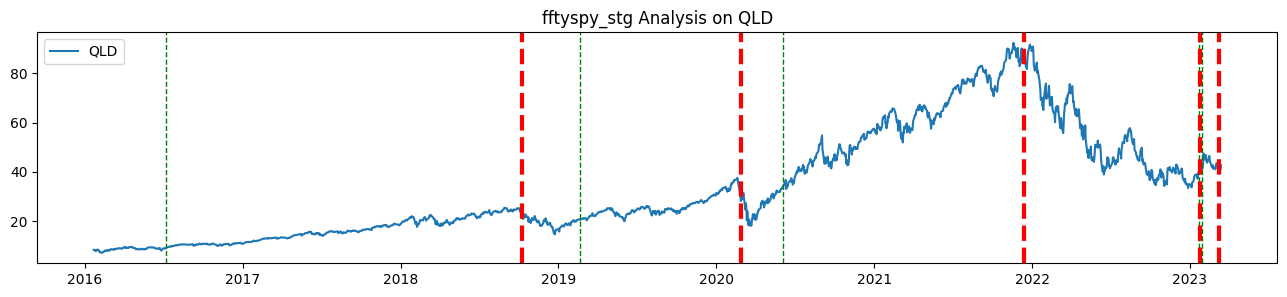

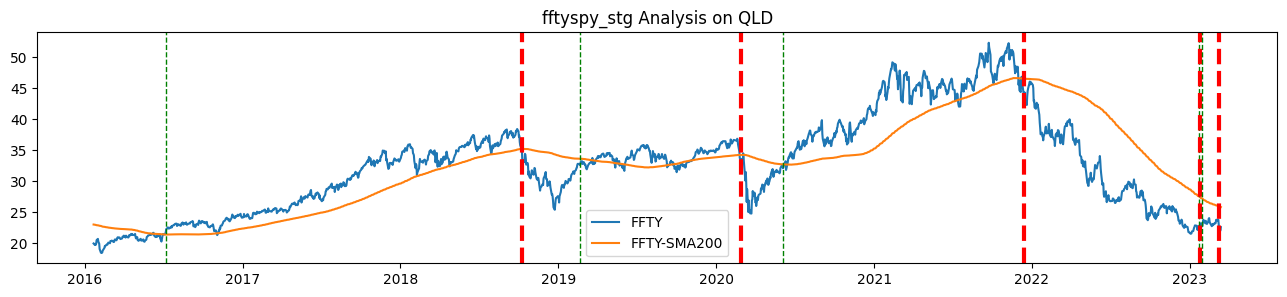

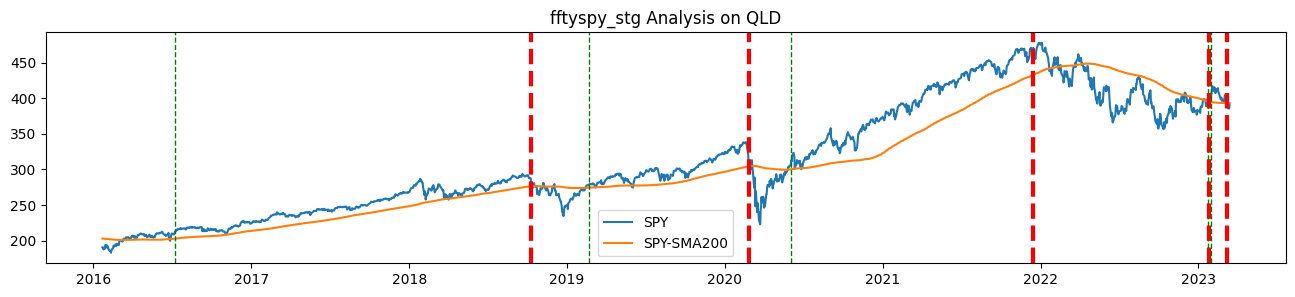

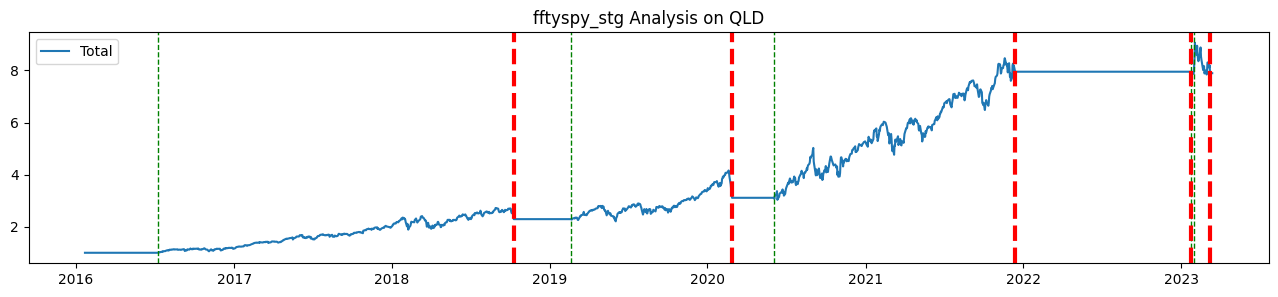

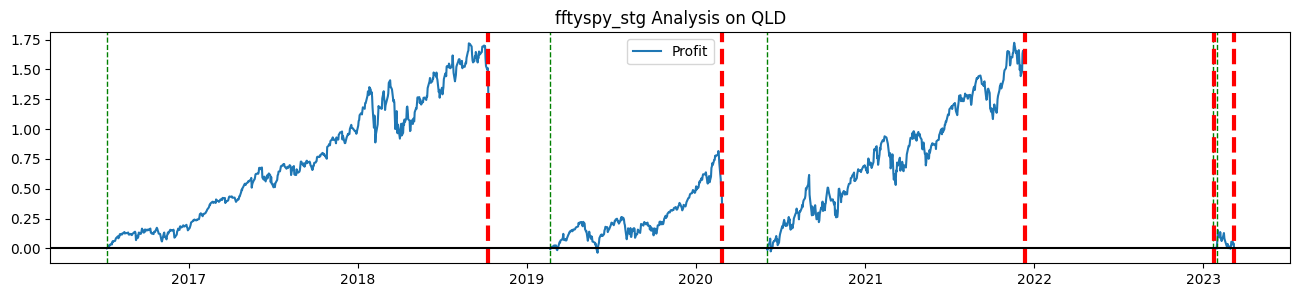

In [19]:
 
stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                 spy_consecutive_buy_threshold = 1, spy_consecutive_days = 5,
                 spy_max_off_new_high_pct = -0.2)
stg.run_strategy([ffty,spy], test_start, test_end)
stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)

stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()

print(stg.joined_data.columns)
print(stg_bt.joined_data.columns)

stg_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY', 'SPY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
stg_bt.joined_data.to_csv('{}-{}.csv'.format(stg_bt.name, ticker.ticker))